In [34]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [35]:
filename = "contest_data_after_change_part3.csv"
data = pd.read_csv('data_20220301/' + filename, index_col=0)

In [36]:
href = pd.read_csv("data_20220301/href_20220301_after_change.csv")

In [37]:
data.shape

(1925, 24)

In [38]:
data = data.drop_duplicates()
data.shape

(1925, 24)

In [39]:
data = data.merge(href, left_on='url', right_on='href')
data = data.drop('href', axis=1)
data.shape

(1925, 25)

In [40]:
data.head()

,url,seeker,start_time,name_to_incorporate,slogan_to_incorporate,description,industry,logo_types,logo_to_be_used,colors_to_explore,...,entry_count,deleted_entry_count,deleted,withdrawn,declined,prize,entries,deleted_entries,winners,tags
0,https://99designs.hk/logo-design/contests/logo...,Snoppe,"Fri, 15 Apr 2011 18:26:51 +0000","R&N Manufacturing, Ltd",Unspecified,Fabricates a variety of shapes and sizes of st...,Unspecified,Word mark\nPictorial mark\nAbstract mark\nEmbl...,"Print (Business cards, letterheads, brochures ...","[""Blue as the main color then Silver, White, B...",...,7,149,0,45,78,US$400,"[{'entry_id': 'entry-153', 'participant_id': '...","[{'entry_id': 'entry-110', 'participant_id': '...",['entry-113'],Fast-tracked Logo design
1,https://99designs.hk/logo-design/contests/zumo...,Justinz,"Fri, 15 Apr 2011 18:44:59 +0000",ZumoPrint,Unspecified,We are a commercial printing company that prod...,Unspecified,Abstract mark\nEmblem\nCharacter,"Print (Business cards, letterheads, brochures ...",['blue or red or open to anything'],...,70,145,5,57,9,US$276,"[{'entry_id': 'entry-73', 'participant_id': '4...","[{'entry_id': 'entry-110', 'participant_id': '...",['entry-73'],Guaranteed Fast-tracked Logo design
2,https://99designs.hk/logo-design/contests/blog...,scodtt,"Fri, 15 Apr 2011 18:48:36 +0000",BlogMutt,Unspecified,A crowd of writers helps fill up the blogs of ...,Unspecified,Word mark\nPictorial mark\nAbstract mark\nEmbl...,"Print (Business cards, letterheads, brochures ...",['Open to creativity'],...,37,78,2,29,30,US$200,"[{'entry_id': 'entry-20', 'participant_id': '3...","[{'entry_id': 'entry-84', 'participant_id': '2...",['entry-20'],Guaranteed Fast-tracked Logo design
3,https://99designs.hk/logo-design/contests/logo...,Phillip.switzer,"Fri, 15 Apr 2011 19:05:49 +0000",Teletka,Unspecified,We provide a service that allows someone to ca...,Unspecified,Word mark\nLetter mark\nEmblem\nCharacter\nWeb...,"Online (Website, online advertising, banner ad...",['Open to color schemes'],...,7,32,0,17,11,US$300,"[{'entry_id': 'entry-39', 'participant_id': '3...","[{'entry_id': 'entry-28', 'participant_id': '4...",['entry-39'],Fast-tracked Logo design
4,https://99designs.hk/logo-design/contests/logo...,Dsenai,"Fri, 15 Apr 2011 19:20:53 +0000",proQur,Unspecified,proQur makes web-based software that helps mec...,Unspecified,Word mark\nPictorial mark\nWeb 2.0,"Print (Business cards, letterheads, brochures ...",['Open to creativity'],...,4,50,1,31,10,US$200,"[{'entry_id': 'entry-17', 'participant_id': '5...","[{'entry_id': 'entry-53', 'participant_id': '4...",['entry-53'],Guaranteed Fast-tracked Logo design


## get contest tags

In [41]:
data['guaranteed'] = data['tags'].apply(lambda x: 1 if 'Guaranteed' in x else 0)
data['blind'] = data['tags'].apply(lambda x: 1 if 'Blind' in x else 0)
data['not_blind'] = data['tags'].apply(lambda x: 0 if 'Blind' in x else 1)
data['fast_tracked'] = data['tags'].apply(lambda x: 1 if 'Fast-tracked' in x else 0)


In [42]:
data['gold'] = data['tags'].apply(lambda x: 1 if 'Gold' in x else 0)
data['platinum'] = data['tags'].apply(lambda x: 1 if 'Platinum' in x else 0)

In [43]:
# get entry level data
# data = data[(data['gold']==1) | (data['platinum']==1)]
# data.shape

In [44]:
# data[['guaranteed', 'blind', 'not_blind', 'fast_tracked', 'gold', 'platinum']].describe()

## seeker: those who have host more than 1 contest

In [45]:
# data['seeker'].value_counts()[:20]

## contest type

In [46]:
data['contest_type'] = data['url'].apply(lambda x: x.split('/')[3].replace('-', '_'))

In [47]:
data['contest_type'].value_counts()

logo_design    1925
Name: contest_type, dtype: int64

In [48]:
data = data[data['contest_type']=='logo_design']
data.shape

(1925, 32)

In [49]:
data = data.drop('contest_type', axis=1)

## prize

In [50]:
data['prize'] = data['prize'].apply(lambda x: int(x.replace(',', '').replace('US$', '')))

In [51]:
data['prize'].describe()

count    1925.000000
mean      249.194286
std        76.232770
min       200.000000
25%       200.000000
50%       200.000000
75%       300.000000
max      1042.000000
Name: prize, dtype: float64

<AxesSubplot:>

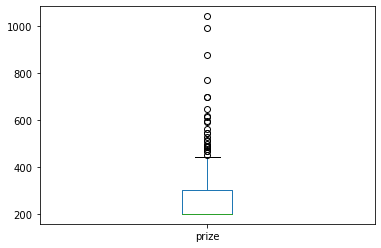

In [52]:
data['prize'].plot(kind='box')

In [53]:
import math
data['prize_log'] = data['prize'].apply(math.log)

In [54]:
data[['prize','prize_log']][:5]

,prize,prize_log
0,400,5.991465
1,276,5.620401
2,200,5.298317
3,300,5.703782
4,200,5.298317


## start time

In [55]:
data['start_date'] = data['start_time'].apply(lambda x: pd.to_datetime(x).date())

## number of winners

In [56]:
data['number_of_winners'] = data['winners'].apply(lambda x: len(str(x)[1:-1].split(',')))

In [57]:
data['number_of_winners'].value_counts()

1    1893
2      31
3       1
Name: number_of_winners, dtype: int64

In [58]:
data['multi_winner'] = data['number_of_winners'].apply(lambda x: 1 if x > 1 else 0)


In [59]:
data['multi_winner'].value_counts()

0    1893
1      32
Name: multi_winner, dtype: int64

## number of submission

In [60]:
data['total_submission'] = data['entry_count'] + data['deleted_entry_count']

## number of participants

In [61]:
def get_number_of_participants(entries, deleted_entries):
    participant_ids = []

    pattern = "'participant_id': '(\d{5,7}')"
    participant_ids += re.findall(pattern, entries) 
    participant_ids += re.findall(pattern, deleted_entries) 

    return len(set(participant_ids))
    

In [62]:
data['number_of_participants'] = data.apply(lambda row: get_number_of_participants(row['entries'], row['deleted_entries']), axis=1)

In [63]:
data[['total_submission', 'number_of_participants']].describe()

,total_submission,number_of_participants
count,1925.000000,1925.000000
mean,123.066494,26.210390
std,192.611257,38.862047
min,1.000000,1.000000
25%,51.000000,12.000000
50%,83.000000,18.000000
75%,136.000000,29.000000
max,4483.000000,874.000000


## number of submission per participants

In [64]:
data['number_of_submission_per_participants'] = data['total_submission'] / data['number_of_participants']

In [65]:
# data_entry_level.shape

In [66]:
data.to_csv('data_20220301/cleaned_' + filename, index=False)